#Faça o setup do notebook

In [ ]:
import pandas as pd #principal biblioteca para manipulação de dados
import numpy as np #principal biblioteca para cálculos matemáticos
import seaborn as sbn # uma das principais bibliotecas para visualização de dados
import matplotlib as plt #uma das principais bibliotecas para visualização de dados
import plotly.graph_objects as go #uma das principais bibliotecas para visualização de dados
import plotly.express as px #uma das principais bibliotecas para visualização de dados
import datetime as dt #uma das principais bibliotecas para manipulação de datas
import scipy.stats as stats #uma das principais bibliotecas estatísticas

#Importe a base de dados



*   Dados obtidos do Sistema Único Brasileiro
*   Setor público
*   Atenção Primária
*   Nível municipal de uma grande cidade Brasileira
*   Cidade perde cerca 20 milhões por ano com no-show







In [ ]:
df = pd.read_csv("/content/KaggleV2-May-2016 (1).csv")

In [ ]:
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [ ]:
df.query("AppointmentID == 5626772")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No


In [ ]:
df.head(3).T

,0,1,2
PatientId,29872499824296.0,558997776694438.0,4262962299951.0
AppointmentID,5642903,5642503,5642549
Gender,F,M,F
ScheduledDay,2016-04-29T18:38:08Z,2016-04-29T16:08:27Z,2016-04-29T16:19:04Z
AppointmentDay,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z,2016-04-29T00:00:00Z
Age,62,56,62
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA
Scholarship,0,0,0
Hipertension,1,0,0
Diabetes,0,0,0


#Compreenda conjunto de dados

####Significado

* PatientID: identificador exclusivo de um paciente
* AppointmentID: um identificador exclusivo de um agendamento
* Gender: identifica o sexo do paciente
* ScheduledDay: dia e hora em que o paciente marcou a consulta
* AppointmentDay: dia em que o paciente deve comparecer à consulta marcada
* Age: identifica a idade do paciente.
* Neighbourhood: pelo que entendi, trata-se do endereço do local de atendimento
* Scholarship: identifica se o paciente recebe Bolsa Família
* Hipertension: identifica se o paciente tem histórico de hipertensão
* Diabetes: identifica se o paciente tem histórico de diabetes
* Alcoholism: identifica se o paciente tem histórico de alcoolismo
* Handicap: identifica se o paciente é portador de alguma deficiência
* SMS_received: identifica se o paciente recebeu um lembrete por SMS
* No-show: é o nosso target ou variável-alvo, identificando se ocorreu ou não falta do paciente à consulta

#### O que falta?



*   Não sabemos para qual categoria profissional era a consulta. Será que isso influenciaria? Não saberemos, mas é possível hipotetizar que sim.
*   Não temos a hora da consulta marcada, apesar de termos a hora da marcação da consulta
*   Temos apenas o bairro, mas não temos a unidade de centro de saúde, não temos a equipe



#Defina objetivos

####Faça perguntas interessantes para os dados: Sobre a ausência

* Quantos faltas ocorreram ao todo?
* Qual é a proporção de atendimentos com no-show frente ao total?
* Quantos pacientes geraram no-show? São poucos ou muitos?


####Faça perguntas interessantes para os dados: Sobre o perfil dos pacientes

* Existe alguma característica comum entre os pacientes que faltam às consultas?
* A idade ou o sexo do paciente influencia na sua disposição para cometer um no-show?
* E se os pacientes têm alguma doença, eles se mostram mais comprometidos a não faltar na consulta? Ou seria o contrário?


####Faça perguntas interessantes para os dados: Sobre a unidade de saúde

* Quais são os bairros com maior índice de não comparecimento?
* Considerando que existem características comuns entre aqueles que não comparecem às consultas, como essas características estão distribuídas geograficamente?

#### Faça perguntas interessantes para os dados: Sobre fatores influentes

* Será que o dia da consulta é o que mais influencia? Por exemplo, sendo sexta-feira um dia de maior falta?
* Ou será que a data do agendamento tem alguma influência na ocorrência do no-show? Por exemplo, o fato de agendar muito antes da consulta pode contribuir?
* Se existe um aviso com SMS, a ocorrência do no-show diminui? Vale a pena gastar o dinheiro do SMS para diminuir o no-show?


####Faça perguntas interessantes para os dados:



*   Os dados estão balanceados em relação à classe de interesse (comparecimento/não comparecimento aos agendamentos)?
*   Como os dados são distribuídos em relação ao local (bairro)? Ou seja todas as unidades possuem um número equivalente e equilibrado de pacientes, afinal quanto mais pacientes é natural que hajam mais faltas, precisaríamos de um coeficiente?

#Descreva o perfil de dados

In [ ]:
df.shape

(110527, 14)

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [ ]:
#Verificando se existem valores nulos, o que exigiria algum tratamento de inputação
df.isna().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df['PatientId'].nunique()

62299

In [ ]:
df['AppointmentID'].nunique()

110527

#Faça a limpeza de dados

####Alterando o tipo dado númerico para texto

In [ ]:
df['PatientId'] = df['PatientId'].astype(str)

In [ ]:
df['AppointmentID'] = df['AppointmentID'].astype(str)

In [ ]:
df[['PatientId','AppointmentID']] = df[['PatientId','AppointmentID']].astype(str)

####Alterando o tipo de dado texto para data-hora

In [ ]:
df['ScheduledDay']= pd.to_datetime(df['ScheduledDay'])

In [ ]:
df['AppointmentDay']=pd.to_datetime(df['AppointmentDay'])

#### Identificando possível idade incorreta

In [ ]:
df['Age'].value_counts(dropna=False)

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: Age, Length: 104, dtype: int64

In [ ]:
df.query("Age == -1")

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
df[(df["Age"] == -1)]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,465943158731293.0,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
df.drop(df[(df["Age"] == -1)].index, axis=0, inplace=True)

In [ ]:
df.shape

(110526, 14)

In [ ]:
df.head(3).T

,0,1,2
PatientId,29872499824296.0,558997776694438.0,4262962299951.0
AppointmentID,5642903,5642503,5642549
Gender,F,M,F
ScheduledDay,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00
AppointmentDay,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
Age,62,56,62
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA
Scholarship,0,0,0
Hipertension,1,0,0
Diabetes,0,0,0


####Identificando possíveis datas incorretas

In [ ]:
df["Days to appointment"] =  pd.to_datetime(df["AppointmentDay"]) - pd.to_datetime(df["ScheduledDay"])

In [ ]:
df["Days to appointment"].describe()

count                        110526
mean      9 days 17:08:42.047952517
std      15 days 05:51:31.240428096
min               -7 days +10:10:40
25%               -1 days +15:41:32
50%                 3 days 11:22:33
75%         14 days 07:41:37.750000
max               178 days 13:19:01
Name: Days to appointment, dtype: object

In [ ]:
#Convertendo a diferença apenas em dias
df["Days to appointment"] = df["Days to appointment"].dt.days

In [ ]:
df["Days to appointment"].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Days to appointment, dtype: float64

Podemos observar alguns valores negativos na coluna “Dias até consulta”. Isso significa que para alguns registros, a data de agendamento foi registrada como uma data posterior à data da consulta, o que pode ser um erro por diversos motivos:

* Erro nos registros de datas
* Um erro ao inverter as datas
* Apenas a data da Consulta foi registrada, mas não a hora exata (para o mesmo dia)

Para decidir o que fazer com este erro vamos analisar detalhadamente estes valores

In [ ]:
fig = px.histogram(df["Days to appointment"])
fig.show()

In [ ]:
df[df["Days to appointment"]== -1].head(3).T

,0,1,2
PatientId,29872499824296.0,558997776694438.0,4262962299951.0
AppointmentID,5642903,5642503,5642549
Gender,F,M,F
ScheduledDay,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00
AppointmentDay,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
Age,62,56,62
Neighbourhood,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA
Scholarship,0,0,0
Hipertension,1,0,0
Diabetes,0,0,0


In [ ]:
df[df["Days to appointment"]== -1].shape

(38562, 15)

Como se pode ver, o conjunto de dados contém muitos valores em que o valor "Dias até a consulta" é -1. Simplesmente dropar tantas linhas seria perder muita informação. No entanto, podemos ver na amostra anterior que isso ocorre porque a data do agendamento tem apenas o dia do agendamento, mas não tem a hora. E como o Consulta foi agendado para o mesmo dia do agendamento então retorna um valor negativo. Uma suposição razoável seria substituir o valor -1 por 0.

In [ ]:
df["Days to appointment"].replace(-1, 0, inplace=True)

In [ ]:
df[df["Days to appointment"]== -1].shape

(0, 15)

Ainda assim, podemos verificar que ainda persistem 5 registos de  erros onde possivelmente as datas parecem estar invertidas. Se assim o for, é razoável inverter essas datas para que tudo faça sentido. Ou, alternativamente, dropar essas linhas, já que são apenas 5 entradas

In [ ]:
df[df["Days to appointment"] < -1]

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Days to appointment
27033,7839272661752.0,5679978,M,2016-05-10 10:51:53+00:00,2016-05-09 00:00:00+00:00,38,RESISTÊNCIA,0,0,0,0,1,0,Yes,-2
55226,7896293967868.0,5715660,F,2016-05-18 14:50:41+00:00,2016-05-17 00:00:00+00:00,19,SANTO ANTÔNIO,0,0,0,0,1,0,Yes,-2
64175,24252258389979.0,5664962,F,2016-05-05 13:43:58+00:00,2016-05-04 00:00:00+00:00,22,CONSOLAÇÃO,0,0,0,0,0,0,Yes,-2
71533,998231581612122.0,5686628,F,2016-05-11 13:49:20+00:00,2016-05-05 00:00:00+00:00,81,SANTO ANTÔNIO,0,0,0,0,0,0,Yes,-7
72362,3787481966821.0,5655637,M,2016-05-04 06:50:57+00:00,2016-05-03 00:00:00+00:00,7,TABUAZEIRO,0,0,0,0,0,0,Yes,-2


In [ ]:
df.drop(df[df["Days to appointment"] < -1].index, axis=0, inplace=True)

In [ ]:
df.shape

(110521, 15)

####Identificando possíveis linhas duplicatas

In [ ]:
df.duplicated().any()

False

####Alternando nome das colunas

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'Days to appointment'],
      dtype='object')

In [ ]:
df = df.rename(columns={'PatientId': 'Paciente_Id',
                        'AppointmentID': 'Atendimento_Id',
                        'Gender': 'Sexo',
                        'ScheduledDay': 'Data_Hora_Agendamento',
                        'Age':'Idade',
                        'AppointmentDay': 'Data_Consulta',
                        'Neighbourhood': 'Local_Consulta',
                        'Scholarship': 'Bolsita',
                        'Hipertension': 'Historico_Hipertensao',
                        'Diabetes': 'Historico_Diabetes',
                        'Alcoholism': 'Historico_Alcoolismo',
                        'Handcap': 'Historico_Deficiencia',
                        'No-show': 'No_Show',
                        'Days to appointment' : 'Dias_agendamento_consulta'})

In [ ]:
df.columns

Index(['Paciente_Id', 'Atendimento_Id', 'Sexo', 'Data_Hora_Agendamento',
       'Data_Consulta', 'Idade', 'Local_Consulta', 'Bolsita',
       'Historico_Hipertensao', 'Historico_Diabetes', 'Historico_Alcoolismo',
       'Historico_Deficiencia', 'SMS_received', 'No_Show',
       'Dias_agendamento_consulta'],
      dtype='object')

#Faça a engenharia de novas variáveis

####Adicionando o dia da semana como variável

In [ ]:
#https://www.programiz.com/python-programming/datetime/strftime
df["Data_Agendamento_DiaSemana"] = df["Data_Hora_Agendamento"].dt.strftime("%A")
df["Data_Consulta_DiaSemana"] = df["Data_Consulta"].dt.strftime("%A")

In [ ]:
df.head(3).T

,0,1,2
Paciente_Id,29872499824296.0,558997776694438.0,4262962299951.0
Atendimento_Id,5642903,5642503,5642549
Sexo,F,M,F
Data_Hora_Agendamento,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00
Data_Consulta,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
Idade,62,56,62
Local_Consulta,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA
Bolsita,0,0,0
Historico_Hipertensao,1,0,0
Historico_Diabetes,0,0,0


####Adicionando alguma condição clínica como variável

In [ ]:
conditions = [ (df['Historico_Hipertensao'] == 1) |
              (df['Historico_Diabetes'] == 1) |
              (df['Historico_Alcoolismo'] == 1) ]
choices = [ 1]
df["Historico_Condicoes_Saude"] = np.select(conditions, choices, default= 0)

In [ ]:
df.head(3).T

,0,1,2
Paciente_Id,29872499824296.0,558997776694438.0,4262962299951.0
Atendimento_Id,5642903,5642503,5642549
Sexo,F,M,F
Data_Hora_Agendamento,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00
Data_Consulta,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00
Idade,62,56,62
Local_Consulta,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA
Bolsita,0,0,0
Historico_Hipertensao,1,0,0
Historico_Diabetes,0,0,0


####Adicionando Data de Agendamento e Data da Consulta

In [ ]:
df['Data_Agendamento'] = df['Data_Hora_Agendamento'].dt.date

In [ ]:
df['Data_Consulta'] = df['Data_Consulta'].dt.date

In [ ]:
df.head(3).T

,0,1,2
Paciente_Id,29872499824296.0,558997776694438.0,4262962299951.0
Atendimento_Id,5642903,5642503,5642549
Sexo,F,M,F
Data_Hora_Agendamento,2016-04-29 18:38:08+00:00,2016-04-29 16:08:27+00:00,2016-04-29 16:19:04+00:00
Data_Consulta,2016-04-29,2016-04-29,2016-04-29
Idade,62,56,62
Local_Consulta,JARDIM DA PENHA,JARDIM DA PENHA,MATA DA PRAIA
Bolsita,0,0,0
Historico_Hipertensao,1,0,0
Historico_Diabetes,0,0,0


####Adicionando faixa etária como variável

In [ ]:
df['Idade'].describe()

count    110521.000000
mean         37.089386
std          23.109885
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Idade, dtype: float64

In [ ]:
df["Faixa_Etaria_Categoria"] = pd.cut(df['Idade'], [0,3,12,18,26,45,65,116],
                                      labels=["Bebê","Criança","Adolescente","Jovem Adulto","Adulto","Adulto Maduro","Idoso"]
                                      )

In [ ]:
df["Faixa_Etaria_Categoria"].value_counts()

Adulto Maduro    29640
Adulto           27702
Idoso            13300
Criança          12092
Jovem Adulto     11014
Adolescente       7830
Bebê              5404
Name: Faixa_Etaria_Categoria, dtype: int64

####Outras ideias?

In [ ]:
#Que tal verificar se os pacientes já tiveram histórico de no_show? Será que isso seria importante para uma nova ocorrência?

In [ ]:
df['Paciente_Id'].nunique()

62298

In [ ]:
df_pacientes_agrupado = df.query('No_Show == "Yes"').groupby(['Paciente_Id']).aggregate({"Atendimento_Id":['nunique']})

In [ ]:
df_pacientes_agrupado.columns = df_pacientes_agrupado.columns.droplevel(0)

In [ ]:
df_pacientes_agrupado.reset_index(level=0, inplace=True)

In [ ]:
df_pacientes_agrupado

,Paciente_Id,nunique
0,111124532532143.0,1
1,11114485119737.0,1
2,111296146416322.0,1
3,111344723737477.0,1
4,111346221769879.0,1
...,...,...
17656,9998948166645.0,1
17657,99994953287696.0,1
17658,999954269492.0,1
17659,9999737245272.0,1


In [ ]:
df_pacientes_agrupado['Paciente_Id'].nunique()

17661

In [ ]:
fig = px.histogram(df_pacientes_agrupado, x="nunique", nbins=20,)
fig.show()

Será que simplesmente pegar o número total de faltas de um paciente seria o suficiente? Ou precisaríamos de pegar o número de faltas ocorridas até o dia da linha do agendamento? Não poderia ocorrer um data leakage?

#Faça a análise descritiva

####Conceitos importantes

<a href="https://imgur.com/8XiXAgx"><img src="https://i.imgur.com/8XiXAgx.png" title="source: imgur.com" /></a>

####Qual período de análise?

In [ ]:
min(df['Data_Agendamento'])

datetime.date(2015, 11, 10)

In [ ]:
max(df['Data_Agendamento'])

datetime.date(2016, 6, 8)

In [ ]:
#Agrupando por data de agendamento:
df_periodo = df.groupby(['Data_Agendamento']).aggregate({"Atendimento_Id":['nunique']})

In [ ]:
df_periodo.head(3)

,Atendimento_Id
,nunique
Data_Agendamento,
2015-11-10,1
2015-12-03,1
2015-12-07,10


In [ ]:
df_periodo.columns = df_periodo.columns.droplevel(0)
df_periodo.reset_index(level=0, inplace=True)
print(df_periodo.head())

<Axes: xlabel='Data_Agendamento'>

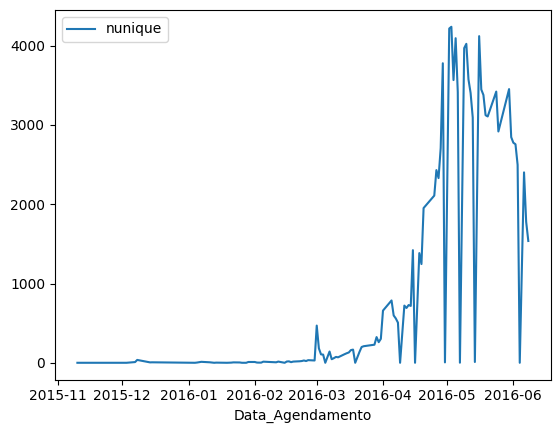

In [ ]:
#Usando o matplotlib
df_periodo.plot(x="Data_Agendamento", y="nunique")

In [ ]:
#Usando o plotly express
fig = px.line(df_periodo, x='Data_Agendamento', y="nunique")
fig.show()

Veja que a quantidade de dados é escassa no início da série temporal. Será que esses dados são representativos da população como um todo? Não poderíamos "dropar" esses períodos com pouca análise?


Esses dados datam de 2016, será que muita coisa mudou após a pandemia? Seria útil um modelo para predizer no show aprendendo com dados representantivos do comportamento pré-pandêmico?

####Quantos no-show ocorreram?

In [ ]:
df["No_Show"].value_counts()

No     88207
Yes    22314
Name: No_Show, dtype: int64

In [ ]:
fig = px.histogram(df["No_Show"],
                   title="Número de casos de no-show",
                   labels={"value": "No_Show"}
                   )
fig.show()

Importante perceber que dentro dos nossos dados a maioria dos casos de pacientes compareceu às suas consultas. É importante ter isso em mente quando criarmos nossos modelos de classificação para garantir que eles não sejam tendenciosos para a classe True-Assistance (viés de disponibilidade)

####Qual a distribuição de dias entre agendamento e consulta?

In [ ]:
fig = px.box(df,
             title="Dias entre agendamento e consulta agroupado por no_show sim e não",
             y="Dias_agendamento_consulta", x="No_Show"
             )

fig.show()

####Qual a incidência de no-show por sexo?

In [ ]:
fig = px.histogram(df["Sexo"],
                   title="Número de registros por sexo",
                   labels={"value": "Sexo"}
                   )
fig.show()

In [ ]:
fig = px.pie(df.groupby(["Sexo"])["Atendimento_Id"].nunique().reset_index(),
             title = "Porcentagem de registro por Sexo",
             names="Sexo", values="Atendimento_Id"
)
fig.show()

Mulheres, como sabido, se consultam mais. Mas será que elas faltam mais?

In [ ]:
df_sexo = df.groupby(['Sexo','No_Show']).aggregate({"Atendimento_Id":['nunique']})

In [ ]:
df_sexo.columns = df_sexo.columns.droplevel(0)

In [ ]:
df_sexo.reset_index(level=1, inplace=True)

In [ ]:
df_sexo.reset_index(level=0, inplace=True)

In [ ]:
df_sexo

,Sexo,No_Show,nunique
0,F,No,57245
1,F,Yes,14591
2,M,No,30962
3,M,Yes,7723


In [ ]:
fig = px.bar(df_sexo, barmode="group",
            title ="Número de registros por sexo agrupado por no-show",
            color="Sexo", y="nunique", x="No_Show",  text_auto=True)
fig.show()

In [ ]:
fig = px.pie(df_sexo.query("Sexo == 'F'"),
             title = "Porcentagem de no_show no sexo Feminino",
             names="No_Show", values="nunique"
)
fig.show()

In [ ]:
fig = px.pie(df_sexo.query("Sexo == 'M'"),
             title = "Porcentagem de no_show no sexo Masculino",
             names="No_Show", values="nunique"
)
fig.show()

#Faça análise bivariada

<a href="https://edtisensei.zendesk.com/hc/article_attachments/360039155971/mceclip1.png"><img src="https://edtisensei.zendesk.com/hc/article_attachments/360039155971/mceclip1.png" title="source: imgur.com" /></a>

In [ ]:
df['No_Show'] = np.where(df['No_Show'] == 'No', 0, 1)

In [ ]:
df['Sexo'] = np.where(df['Sexo'] == 'F', 0, 1)

In [ ]:
df_corr = df[['No_Show','Dias_agendamento_consulta','Historico_Condicoes_Saude','Idade','Sexo','Historico_Hipertensao','Historico_Diabetes','Historico_Alcoolismo','Historico_Deficiencia','SMS_received']]

In [ ]:
correlation = df_corr.corr()

<Axes: >

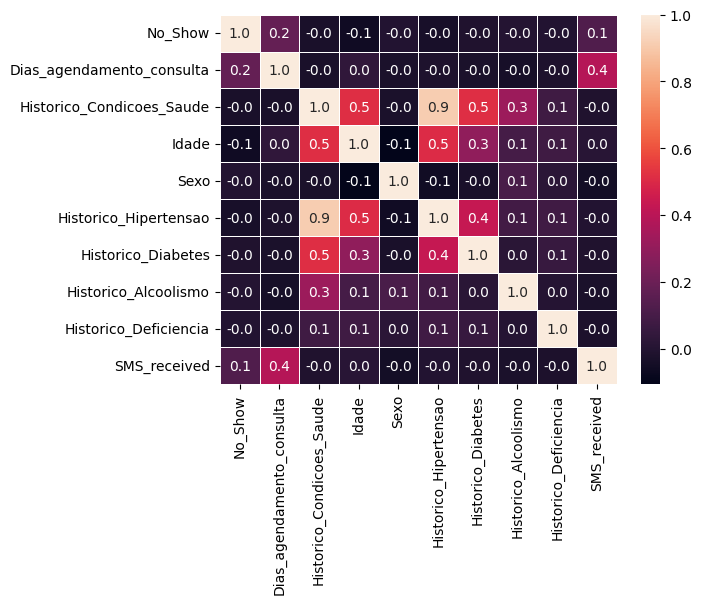

In [ ]:
plot = sbn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot

#Faça testes de hipótese

####Conceitos importantes

<a href="https://imgur.com/EVd2I8M"><img src="https://i.imgur.com/EVd2I8M.png" title="source: imgur.com" /></a>

In [ ]:
df_hipotese = df[["No_Show","Dias_agendamento_consulta"]]

In [ ]:
df_hipotese

,No_Show,Dias_agendamento_consulta
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
110522,0,34
110523,0,34
110524,0,40
110525,0,40


####Testando normalidade

Método visual

<ipython-input-143-042f2a7f203b>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Dias_agendamento_consulta', ylabel='Density'>

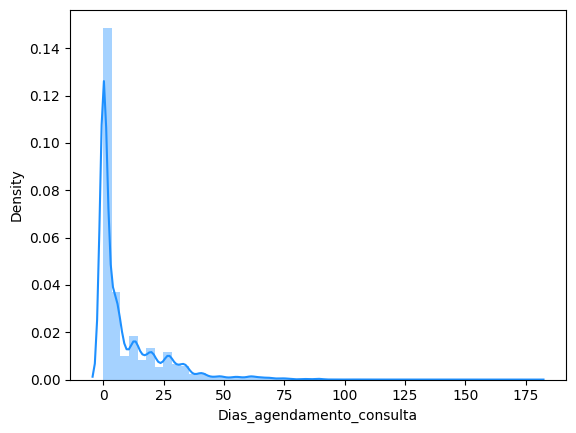

In [ ]:
sbn.distplot(df_hipotese['Dias_agendamento_consulta'], color="dodgerblue", label="Compact",)

Método quantitativo

In [ ]:
from scipy.stats import normaltest

alpha = 0.05
k2, p = normaltest(df_hipotese['Dias_agendamento_consulta'])

#Hipotese nula: Os dados seguem distribuição normal
#Hipotese alternativa: Os dados não seguem distribuição normal

if p < alpha:
    print("A Hipótese Nula pode ser rejeitada")
else:
    print("A hipótese nula não pode ser rejeitada")

A Hipótese Nula pode ser rejeitada


O valor p é a probabilidade de encontrar, em repetidos estudos iguais, um valor igual ou mais extremo em relação ao meu nível de segurança, e isso se dever ao acaso.  Sendo menor do que 5% ou seja menor do 0,05, isso quer dizer que a probabilidade é bastante remota. Assim, eu confio que os resultados não são devido ao acaso, aceitando o risco pequeno de que ainda possam ser. Esse é o conceito correto, mais literal de valor p. Mas tenha atenção então para não entender errado esse conceito. Porque na cabeça de muitas pessoas existem os seguintes equívocos: dizer que o valor p é probabilidade da hipótese nula de um teste ser verdadeira. Ou dizer que o valor p é a probabilidade de um dado resultado ter sido obtido de um acaso. Ou dizer que o valor p é a probabilidade da hipótese nula ter sido enganosamente rejeitada. Isso não é correto, porque não é correto dizer em estatística sobre a probabilidade de coisas que já aconteceram. Quero dizer, o fato da pessoa ser culpada ou inocente, já está na natureza, isso já aconteceu, por mais que não saibamos a verdade sobre isso. Portanto, por definição, devemos usar probabilidade apenas para eventos futuro. Dai o uso correto em dizer que o valor p é a probabilidade de encontrar, em repetidos estudos com semelhante metodologia, um valor igual ou mais extremo em relação ao nível de segurança. Outro a se ter é pensar sobre a magnitude do valor p, como se um estudo que tem um valor p muito menor do que o nível de significância adotado seja vantagem. Não, o valor-p é algo dicotômico. Uma vez determinado o nível, podemos ter significância ou não ter, não importa tanto o quanto aquele valor p é menor que o nível de significância.

<a href="https://www.voxmed.com.br/voxmed/wp-content/uploads/2020/04/Como-arrendondar-as-casas-decimais-do-valor-de-p-1.png"><img src="https://www.voxmed.com.br/voxmed/wp-content/uploads/2020/04/Como-arrendondar-as-casas-decimais-do-valor-de-p-1.png" title="source: imgur.com" /></a>

####Teste de Mann Whitney

O teste U pode ser considerado a versão não paramétrica do teste t, para amostras
independentes. Ao contrário do teste t, que testa a igualdade das médias, o teste de Mann-Whitney (U)
testa a igualdade das medianas

In [ ]:
df_hipotese["Dias_agendamento_consulta"][df_hipotese["No_Show"] == "No"]

Series([], Name: Dias_agendamento_consulta, dtype: int64)

In [ ]:
from scipy.stats import mannwhitneyu

In [ ]:
U1, p = mannwhitneyu(df_hipotese["Dias_agendamento_consulta"][df_hipotese["No_Show"] == 0],
                     df_hipotese["Dias_agendamento_consulta"][df_hipotese["No_Show"] == 1])

In [ ]:
print(U1)

610673904.0


In [ ]:
print(p)

0.0


In [ ]:
print(f"Scientific Notation: {p}")
print(f"Decimal Representation: {p:.7f}")

Scientific Notation: 0.0
Decimal Representation: 0.0000000


Os valores de U calculados pelo teste avaliam o grau de entrelaçamento
dos dados dos dois grupos após a ordenação. A maior separação dos dados em conjunto indica que as
amostras são distintas, rejeitando-se a hipótese de igualdade das medianas.

#Preparando conjunto de dados para modelagem

####Retirando variáveis sem sentido

In [ ]:
df.head(3)

,Paciente_Id,Atendimento_Id,Sexo,Data_Hora_Agendamento,Data_Consulta,Idade,Local_Consulta,Bolsita,Historico_Hipertensao,Historico_Diabetes,Historico_Alcoolismo,Historico_Deficiencia,SMS_received,No_Show,Dias_agendamento_consulta,Data_Agendamento_DiaSemana,Data_Consulta_DiaSemana,Historico_Condicoes_Saude,Data_Agendamento,Faixa_Etaria_Categoria
0,29872499824296.0,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,Friday,Friday,1,2016-04-29,Adulto Maduro
1,558997776694438.0,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,Friday,Friday,0,2016-04-29,Adulto Maduro
2,4262962299951.0,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,Friday,Friday,0,2016-04-29,Adulto Maduro


In [ ]:
data = df.copy()

In [ ]:
data.drop(["Paciente_Id","Atendimento_Id","Data_Hora_Agendamento",
           "Data_Consulta","Local_Consulta","Data_Agendamento","Idade"], axis=1, inplace=True)

In [ ]:
data.head().T

,0,1,2,3,4
Sexo,0,1,0,0,0
Bolsita,0,0,0,0,0
Historico_Hipertensao,1,0,0,0,1
Historico_Diabetes,0,0,0,0,1
Historico_Alcoolismo,0,0,0,0,0
Historico_Deficiencia,0,0,0,0,0
SMS_received,0,0,0,0,0
No_Show,0,0,0,0,0
Dias_agendamento_consulta,0,0,0,0,0
Data_Agendamento_DiaSemana,Friday,Friday,Friday,Friday,Friday


In [ ]:
data["No_Show"].value_counts()

0    88207
1    22314
Name: No_Show, dtype: int64

####Convertendo variáveis categóricas

In [ ]:
data = pd.get_dummies(data)

In [ ]:
data.head().T

,0,1,2,3,4
Sexo,0,1,0,0,0
Bolsita,0,0,0,0,0
Historico_Hipertensao,1,0,0,0,1
Historico_Diabetes,0,0,0,0,1
Historico_Alcoolismo,0,0,0,0,0
Historico_Deficiencia,0,0,0,0,0
SMS_received,0,0,0,0,0
No_Show,0,0,0,0,0
Dias_agendamento_consulta,0,0,0,0,0
Historico_Condicoes_Saude,1,0,0,0,1


#Separando conjunto de dados de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Y = data["No_Show"]
X = data.drop(["No_Show"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state = 0)
print("Train dataset size ",x_train.shape[0])
print("Test dataset size ",x_test.shape[0])

Train dataset size  77364
Test dataset size  33157


#Testando modelo de Regressão Logística

####Treinando modelo de Regressão Logística

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [ ]:
modelo_v1 = LogisticRegression(max_iter=1000, class_weight='balanced',penalty='l2' )
modelo_v1.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

####Predizendo os valores do conjunto teste

In [ ]:
previsoes_v1_proba = modelo_v1.predict_proba(x_test)
previsoes_v1_proba

array([[0.59835376, 0.40164624],
       [0.41848728, 0.58151272],
       [0.63922368, 0.36077632],
       ...,
       [0.46554753, 0.53445247],
       [0.6151999 , 0.3848001 ],
       [0.64788072, 0.35211928]])

In [ ]:
previsoes_v1_class = modelo_v1.predict(x_test)
previsoes_v1_class

array([0, 1, 0, ..., 1, 0, 0])

In [ ]:
previsoes_v1_df = pd.DataFrame(previsoes_v1_proba)
previsoes_v1_df.columns = ['Y_pred_n','Y_pred_s']
y_true = pd.DataFrame(y_test)
y_true.reset_index(inplace=True)
previsoes_v1_df['Y_true'] = y_true['No_Show']

In [ ]:
previsoes_v1_df

,Y_pred_n,Y_pred_s,Y_true
0,0.598354,0.401646,0
1,0.418487,0.581513,0
2,0.639224,0.360776,0
3,0.678898,0.321102,0
4,0.632761,0.367239,0
...,...,...,...
33152,0.498772,0.501228,0
33153,0.555175,0.444825,0
33154,0.465548,0.534452,0
33155,0.615200,0.384800,1


####Controlando os limiares

In [ ]:
# Define o limite e converte as probabilidades em previsões de classe
limite = 0.5
previsoes_v1_df['classe_prevista'] = (previsoes_v1_df.Y_pred_s >= limite).astype('int')
previsoes_v1_df.head()

,Y_pred_n,Y_pred_s,Y_true,classe_prevista
0,0.598354,0.401646,0,0
1,0.418487,0.581513,0,1
2,0.639224,0.360776,0,0
3,0.678898,0.321102,0,0
4,0.632761,0.367239,0,0


In [ ]:
# Define o limite e converte as probabilidades em previsões de classe
limite = 0.6
previsoes_v1_df['classe_prevista'] = (previsoes_v1_df.Y_pred_s >= limite).astype('int')
previsoes_v1_df.head()

,Y_pred_n,Y_pred_s,Y_true,classe_prevista
0,0.598354,0.401646,0,0
1,0.418487,0.581513,0,0
2,0.639224,0.360776,0,0
3,0.678898,0.321102,0,0
4,0.632761,0.367239,0,0


Qual seria o melhor limiar? É possível calcular isso?

####Matriz de confusão

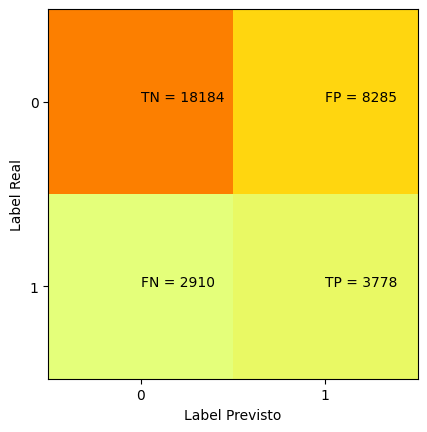

In [ ]:
# Plot com texto
import matplotlib.pyplot as plt
plt.clf()

# Confusion Matrix com definição dos labels
matriz_v1 = confusion_matrix(y_test, previsoes_v1_class, labels=labels)

plt.imshow(matriz_v1, interpolation = 'nearest', cmap = plt.cm.Wistia)
classNames = ['0','1']
plt.ylabel('Label Real')
plt.xlabel('Label Previsto')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]

for i in range(2):
    for j in range(2):
        plt.text(j, i, str(s[i][j]) + " = " + str(matriz_v1[i][j]))
plt.show()

O que é pior nesse caso? Falsos negativos (dizer que uma pessoa provavelmente não vai faltar quando ela provavelmente vai) ou Falsos positivos (dizer que uma pessoa provavelmente vai faltar quando provavelmente ela não vai)?

####Acurácia

Numerador previsões corretas divididas pelo denominador com todas as previsões. A acurácia é uma boa medida quando as classes da variável alvo estão balanceadas ou quase equilibradas. A acurácia NUNCA deve ser usada como métrica quando as classes da variável alvo são minoria de uma classe. Nossas classes estão desbalanceadas, não é mesmo?

In [ ]:
# Acurácia do Modelo de Regressão Logística

# Importa a função
from sklearn.metrics import accuracy_score

# Calcula a acurácia
accuracy_score(y_test, previsoes_v1_class)

0.6623639050577556

####Recall (Sensibilidade)

Recall (também conhecida como sensibilidade) é a fração de eventos positivos que foram previstos corretamente. Portanto, Recall é a proporção de verdadeiros positivos: a capacidade do sistema em predizer corretamente a condição para casos que realmente a têm. O Recall pode ser usado em uma situação em que os Falsos Negativos são considerados mais prejudiciais que os Falsos Positivos. Por exemplo, o modelo deve de qualquer maneira encontrar todos os pacientes doentes, mesmo que classifique alguns saudáveis como doentes (situação de Falso Positivo) no processo. Ou seja, o modelo deve ter alto Recall, pois classificar pacientes doentes como saudáveis pode ser uma tragédia. Um método para aumentar o recall é aumentar o número de amostras que você define como positivo previsto, diminuindo o limite do positivo previsto. Infelizmente, isso também aumentará o número de falsos positivos. Outra métrica de desempenho chamada precisão leva isso em consideração.

In [ ]:
# Importa a função
from sklearn.metrics import recall_score

# Calcula o recall
recall_score(y_test, previsoes_v1_class)

0.5648923444976076

####Precisão (Valor Preditivo positivo)

Precisão (Valor predivitivo positivo) é a fração de eventos positivos previstos que são realmente positivos. A precisão é uma medida que nos diz qual a proporção de pacientes que diagnosticamos como tendo pneumonia, que realmente tinham pneumonia. Os positivos previstos (as pessoas consideradas com pneumonia) são TP e FP e as pessoas que realmente têm pneumonia são TP. A precisão pode ser usada em uma situação em que os Falsos Positivos são considerados mais prejudiciais que os Falsos Negativos. Por exemplo, ao classificar uma ação como um bom investimento, é necessário que o modelo esteja correto, mesmo que acabe classificando bons investimentos como maus investimentos (situação de Falso Negativo) no processo. Ou seja, o modelo deve ser preciso em suas classificações, pois a partir do momento que consideramos um investimento bom quando na verdade ele não é, uma grande perda de dinheiro pode acontecer.

In [ ]:
# Importa a função
from sklearn.metrics import precision_score

# Calcula o precision
precision_score(y_test, previsoes_v1_class)

0.3131890906076432

O recall nos fornece informações sobre o desempenho de um classificador em relação a falsos negativos (quantos perdemos), enquanto a precisão nos fornece informações sobre seu desempenho em relação a falsos positivos (quantos capturamos). Precisão é ser preciso. Portanto, mesmo que tenhamos conseguido capturar apenas um caso de pneumonia e o tenhamos capturado corretamente, somos 100% precisos. Recall se refere a capturar todos os casos que têm "pneumonia" com a resposta "pneumonia". Portanto, se simplesmente prevemos todos os casos como "pneumonia", temos 100% de recall. Basicamente, se quisermos nos concentrar mais na minimização de falsos negativos, gostaríamos que o nosso recall fosse o mais próximo possível de 100%, sem que a precisão fosse muito ruim e se queremos nos concentrar em minimizar os falsos positivos, nosso foco deve ser precisão o mais próximo possível de 100%.

####Especificidade

Especificidade é uma medida que nos diz que proporção de pacientes que NÃO tiveram pneumonia foi prevista pelo modelo como não-pneumonia. Os negativos reais (as pessoas que NÃO têm pneumonia) são FP e TN e as pessoas diagnosticadas que não têm pneumonia são TN. (Nota: FP está incluído porque a pessoa realmente NÃO tem pneumonia, embora o modelo previsse o contrário).

In [ ]:
# Calculando a Especificidade de forma manual porque não existe uma função pronta na biblioteca

TN, FP, FN, TP = confusion_matrix(y_test, previsoes_v1_class).ravel()

Especificidade = TN / (TN + FP)

print(Especificidade)

0.6869923306509502


####F1 score

Mas o que você faria se um modelo fosse melhor em recall e o outro fosse melhor em precisão. Um método usado por alguns Cientistas de Dados é a média harmônica entre eles, chamado de F1 Score. O F1 Score é a média harmônica de recall e precision, com uma pontuação mais alta para um modelo melhor. A média harmônica é uma média quando x e y são iguais. Mas quando x e y são diferentes, fica mais próximo do número menor em comparação com o número maior. O F1 Score é calculado usando a seguinte fórmula: F1 Score = 2 * (Precision * Recall) / (Precision + Recall). O F1-Score é simplesmente uma maneira de observar somente 1 métrica ao invés de duas (precisão e recall) em alguma situação. É uma média harmônica entre as duas, que está muito mais próxima dos menores valores do que uma média aritmética simples. Ou seja, quando temos um F1-Score baixo, é um indicativo de que ou a precisão ou o recall está baixo.

In [ ]:
# Importa a função
from sklearn.metrics import f1_score

# Calcula o F1-Score
f1_score(y_test, previsoes_v1_class)

0.4029651751906565

####Curva ROC

As curvas ROC são MUITO úteis para entender o equilíbrio entre a taxa de verdadeiros positivos e a taxa de falsos posiitivos. O Scikit-Learn incorporou funções para curvas ROC e para analisá-las. As entradas para essas funções (roc_curve eroc_auc_score) são os rótulos reais e as probabilidades previstas (não os rótulos previstos).



In [ ]:
previsoes_v1_df

,Y_pred_n,Y_pred_s,Y_true,classe_prevista
0,0.598354,0.401646,0,0
1,0.418487,0.581513,0,0
2,0.639224,0.360776,0,0
3,0.678898,0.321102,0,0
4,0.632761,0.367239,0,0
...,...,...,...,...
33152,0.498772,0.501228,0,0
33153,0.555175,0.444825,0,0
33154,0.465548,0.534452,0,0
33155,0.615200,0.384800,1,0


In [ ]:
from sklearn.metrics import roc_curve

fpr_LR, tpr_LR, thresholds_LR = roc_curve(previsoes_v1_df.Y_true.values, previsoes_v1_df.Y_pred_s.values)

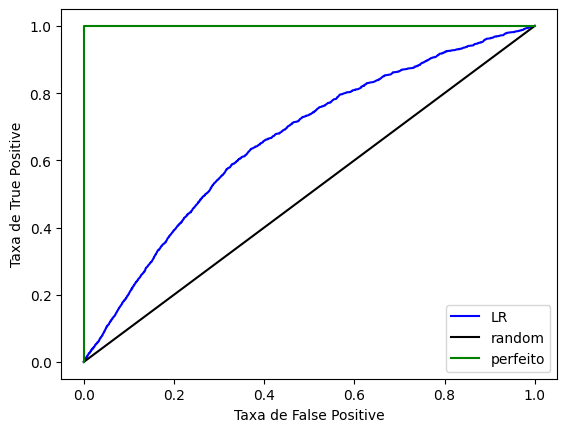

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(fpr_LR, tpr_LR, 'b-', label = 'LR')
plt.plot([0,1], [0,1], 'k-', label = 'random')
plt.plot([0,0,1,1], [0,1,1,1], 'g-', label = 'perfeito')
plt.legend()
plt.xlabel('Taxa de False Positive')
plt.ylabel('Taxa de True Positive')
plt.show()

####Área sob a curva

In [ ]:
from sklearn.metrics import roc_auc_score

auc_LR = roc_auc_score(previsoes_v1_df.Y_true.values, previsoes_v1_df.Y_pred_s.values)
print('AUC LR:%.3f'% auc_LR)

AUC LR:0.660


####Feature importance

In [ ]:
coefficients = modelo_v1.coef_

<Axes: ylabel='Feature'>

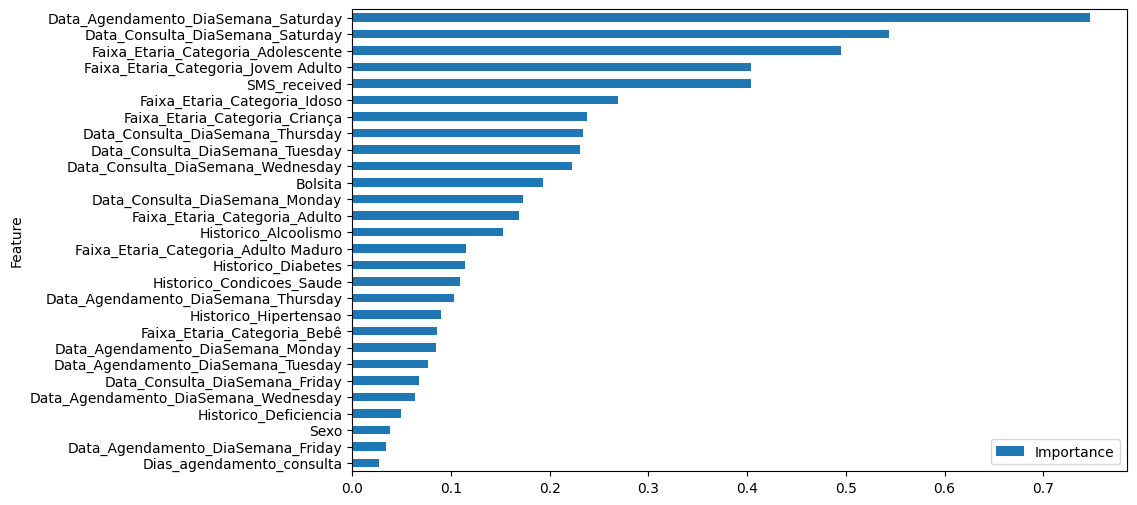

In [ ]:
avg_importance = np.mean(np.abs(coefficients),axis=0)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=True)
feature_importance.plot(x='Feature', y='Importance',kind='barh',figsize=(10,6))

#Testando modelo de Árvore de Decisão

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz

In [ ]:
dt = DecisionTreeClassifier(class_weight="balanced")

In [ ]:
dt = dt.fit(x_train,y_train)

In [ ]:
y_hat = dt.predict(x_test)

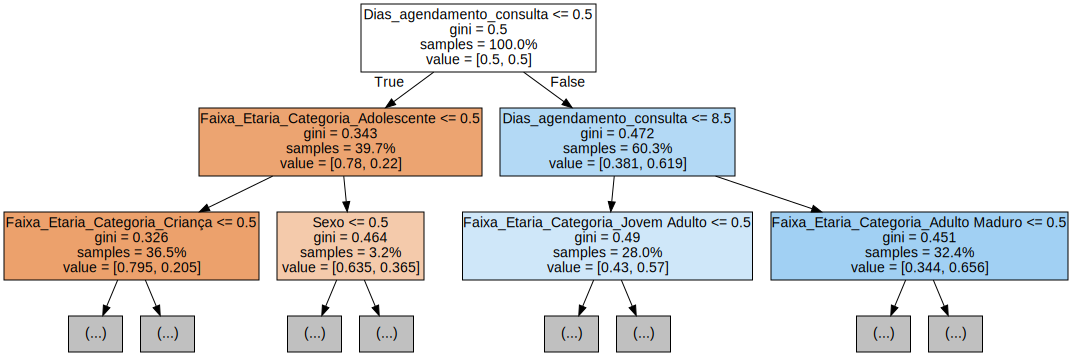

In [ ]:
# Visualize tree
dot_data = export_graphviz(dt,
                           feature_names = x_train.columns,
                           filled = True,
                           max_depth=2,
                           impurity=True,
                           proportion = True)
graph = graphviz.Source(dot_data)
display(graph)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_hat))

Accuracy: 0.6401966402267998
